# Set Up

In [1]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/HWK'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from HWK_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

Cloning into 'thesis'...
remote: Enumerating objects: 866, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 866 (delta 79), reused 26 (delta 14), pack-reused 751
Receiving objects: 100% (866/866), 47.03 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (522/522), done.
Updating files: 100% (80/80), done.
Mounted at /content/drive


# Number of comments

## Facebook

In [ ]:
facebook_news=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews.csv')
facebook_vaccines_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored.csv')
facebook_brexit_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored.csv')

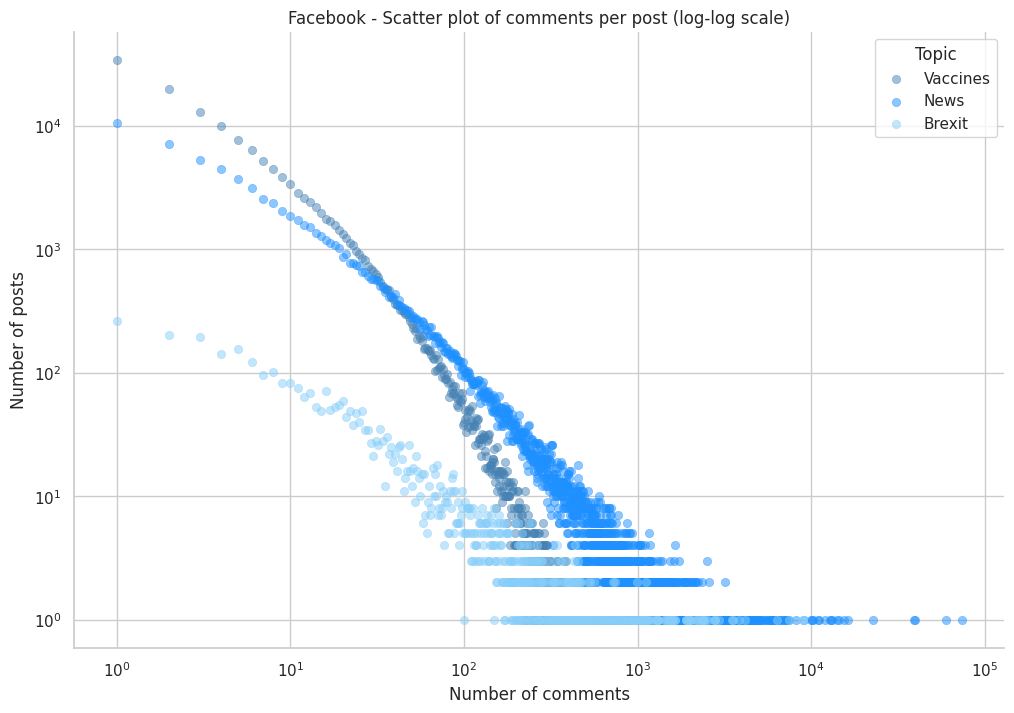

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di commenti per ogni post per i dati di vaccines
conversation_size_vaccines = facebook_vaccines_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_vaccines.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di news
conversation_size_news = facebook_news.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_news.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di brexit
conversation_size_brexit = facebook_brexit_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_brexit.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti per i dati di vaccines
post_count_vaccines = conversation_size_vaccines.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di news
post_count_news = conversation_size_news.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di brexit
post_count_brexit = conversation_size_brexit.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di vaccines
sns.scatterplot(data=post_count_vaccines, x='comment_count', y='post_count', alpha=0.5, label='Vaccines', color='steelblue', edgecolor=None)

# Scatter plot per i dati di news
sns.scatterplot(data=post_count_news, x='comment_count', y='post_count', alpha=0.5, label='News', color='dodgerblue', edgecolor=None)

# Scatter plot per i dati di brexit
sns.scatterplot(data=post_count_brexit, x='comment_count', y='post_count', alpha=0.5, label='Brexit', color='lightskyblue', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Facebook - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')

# Rimuovi la griglia
plt.grid(False)

plt.legend(title='Topic')
plt.show()


## Gab

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
gab = pd.read_parquet('/content/drive/MyDrive/thesis/data/gab/gab_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = gab.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyboardInterrupt: 

## Reddit

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
reddit = pd.read_parquet('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = reddit.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyError: 'Column not found: comment_id'

## YouTube

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
yt = pd.read_parquet('/content/drive/MyDrive/thesis/data/youtube/youtube_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = yt.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='red', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('YouTube - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


TypeError: read_table() got an unexpected keyword argument 'usecols'

# Model simulation

In [2]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')

In [3]:
#fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_1000h'] = fb['temporal_distance_birth_h'] / 100

#fbb= fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_1000h'] = fbb['temporal_distance_birth_h'] / 100

#rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_1000h'] = rd['temporal_distance_birth_h'] / 100

In [ ]:

time_intervals = np.arange(0, 1, 0.02)  # Utilizzo di np.arange per intervalli decimali

fbb_ECDF = calculate_ECDF(fbb, time_intervals)
fbb_ECDF['Platform']='Facebook - Brexit'
fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

combined_results = pd.concat([fb_ECDF, rd_ECDF,fbb_ECDF], ignore_index=True)


/content/thesis/src/HWK/HWK_package/functions.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='Time Grid Value', y='Share', hue='Platform', err_style='band', ci=level)


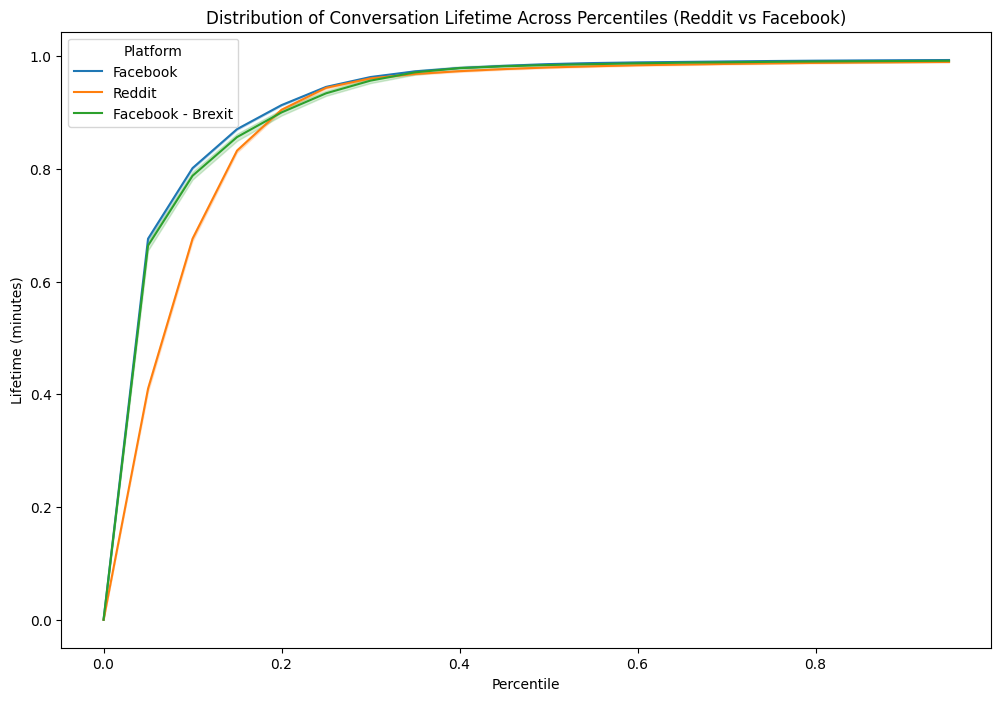

In [15]:
df=combined_results
plot_ECDF(df,level=95)

## Parameter's Choice

### Entrance in theconversation

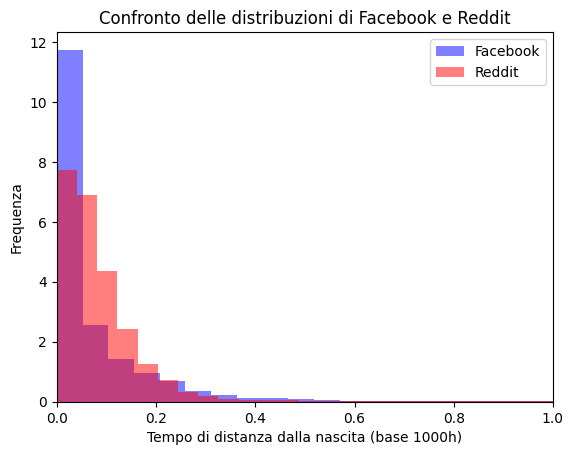

In [23]:
import matplotlib.pyplot as plt

plt.hist(fb['temporal_distance_birth_base_1000h'], bins=10000, alpha=0.5, label='Facebook', color='blue',density=True)
plt.hist(rd['temporal_distance_birth_base_1000h'], bins=10000, alpha=0.5, label='Reddit', color='red',density=True)

plt.title('Confronto delle distribuzioni di Facebook e Reddit')
plt.xlabel('Tempo di distanza dalla nascita (base 1000h)')
plt.ylabel('Frequenza')
plt.legend()
plt.xlim(0,1)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parametri della distribuzione beta
alpha = 2.5
beta_param = 32

# Generiamo una griglia di valori x per il plot
x = np.linspace(0, 1, 1000)

# Calcoliamo la densità di probabilità (PDF) della distribuzione beta
pdf_beta = beta.pdf(x, alpha, beta_param)
pdf_beta2 = beta.pdf(x, 0.5, 13)

# Plot della distribuzione beta
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_beta, 'b-', lw=2, label=f'Beta({alpha}, {beta_param}) Reddit')
plt.plot(x, pdf_beta2, 'r-', lw=2, label=f'Beta({1}, {13}) Facebook')
plt.title(f'Distribuzione Beta PDF con Alpha = {alpha}, Beta = {beta_param}')
plt.xlabel('x')
plt.ylabel('Densità di Probabilità')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Come possiamo modellare il tempo tra i  commenti

In [49]:
df_2_fb = fb[fb['sequential_number_of_comment_by_user_in_thread'] == 2][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]
df_3_fb = fb[fb['sequential_number_of_comment_by_user_in_thread'] == 3][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]

df_2_reddit = rd[rd['sequential_number_of_comment_by_user_in_thread'] == 2][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]
df_3_reddit = rd[rd['sequential_number_of_comment_by_user_in_thread'] == 3][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]

# Rinominare la colonna 'temporal_distance_birth_base_1000h' per chiarire di quale commento si tratta
df_2_fb = df_2_fb.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_2'})
df_3_fb = df_3_fb.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_3'})

df_2_reddit = df_2_reddit.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_2'})
df_3_reddit = df_3_reddit.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_3'})

# Unire i due DataFrame sui campi user_id e post_id
merged_fb = pd.merge(df_2_fb, df_3_fb, on=['user_id', 'post_id'])
merged_reddit = pd.merge(df_2_reddit, df_3_reddit, on=['user_id', 'post_id'])

# Calcolare la differenza tra il momento di arrivo del commento 3 e il momento di arrivo del commento 2
merged_fb['time_difference'] = merged_fb['arrival_time_3'] - merged_fb['arrival_time_2']
merged_reddit['time_difference'] = merged_reddit['arrival_time_3'] - merged_reddit['arrival_time_2']

import matplotlib.pyplot as plt

# Assuming merged_fb and merged_reddit are already defined and have 'time_difference' columns

plt.figure(figsize=(12, 6))

# Create boxplots for FB and Reddit time differences on the same plot
plt.boxplot([merged_fb['time_difference'], merged_reddit['time_difference']], labels=['FB', 'Reddit'],showfliers=False)

# Set the title and labels
plt.title('Time Difference (Comment 3 - Comment 2) for FB and Reddit')
plt.ylabel('Time Difference (hours)')
plt.xlabel('Platform')

# Display the plot
plt.show()

print(np.sqrt(merged_fb['time_difference'].var()))
print(np.sqrt(merged_reddit['time_difference'].var()))
print(merged_reddit['time_difference'].mean())

0.010347034687211707


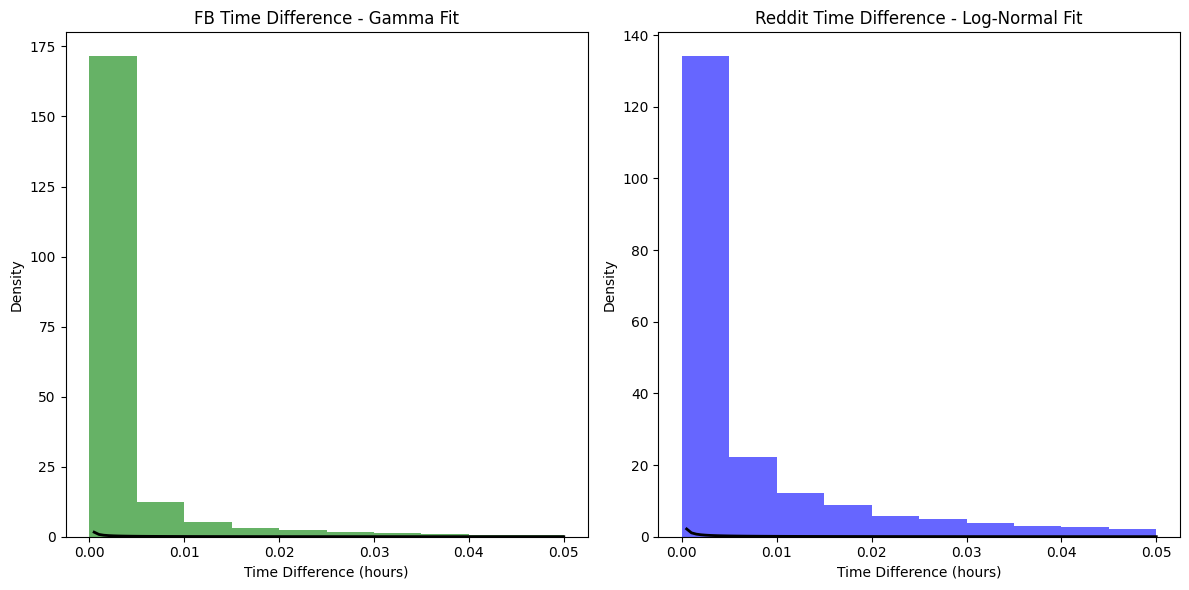

In [36]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data for demonstration
merged_fb=merged_fb[merged_fb['time_difference']<0.05]
merged_reddit=merged_reddit[merged_reddit['time_difference']<0.05]

fb_data = merged_fb['time_difference']
reddit_data = merged_reddit['time_difference']

# Fit distributions
fb_params = stats.lognorm.fit(fb_data)
reddit_params = stats.lognorm.fit(reddit_data)

# Create a range of values
x_fb = np.linspace(min(fb_data), max(fb_data), 100)
x_reddit = np.linspace(min(reddit_data), max(reddit_data), 100)

# Get the fitted PDF
fb_pdf = stats.lognorm.pdf(x_fb, *fb_params)
reddit_pdf = stats.lognorm.pdf(x_reddit, *reddit_params)

# Plot the results
plt.figure(figsize=(12, 6))

# FB distribution plot
plt.subplot(1, 2, 1)
plt.hist(fb_data, bins=10, density=True, alpha=0.6, color='g')
plt.plot(x_fb, fb_pdf, 'k', linewidth=2)
plt.title('FB Time Difference - Gamma Fit')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Density')

# Reddit distribution plot
plt.subplot(1, 2, 2)
plt.hist(reddit_data, bins=10, density=True, alpha=0.6, color='b')
plt.plot(x_reddit, reddit_pdf, 'k', linewidth=2)
plt.title('Reddit Time Difference - Log-Normal Fit')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


TypeError: can only concatenate str (not "float") to str

## Manual simulation

### Parameters FB

In [58]:
a=0.8# 2
b=20
alpha=0.98# 0.8
lambda_=5
mu=0.002 #0.002
sd=0.01
k=1.01
simulated, observed=simulate_data(fb, alpha, lambda_, mu, sd, a, b, k, num_threads=10)

 19%|█▉        | 19/100 [00:13<00:57,  1.41it/s]


KeyboardInterrupt: 

In [56]:
time_intervals = np.arange(0, 1, 0.02)  # Utilizzo di np.arange per intervalli decimali

simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Observed'

reddit_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:10])], time_intervals)
reddit_ECDF['Platform']='Reddit'
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 10/10 [00:00<00:00, 71.10it/s]


In [57]:


error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 9.42


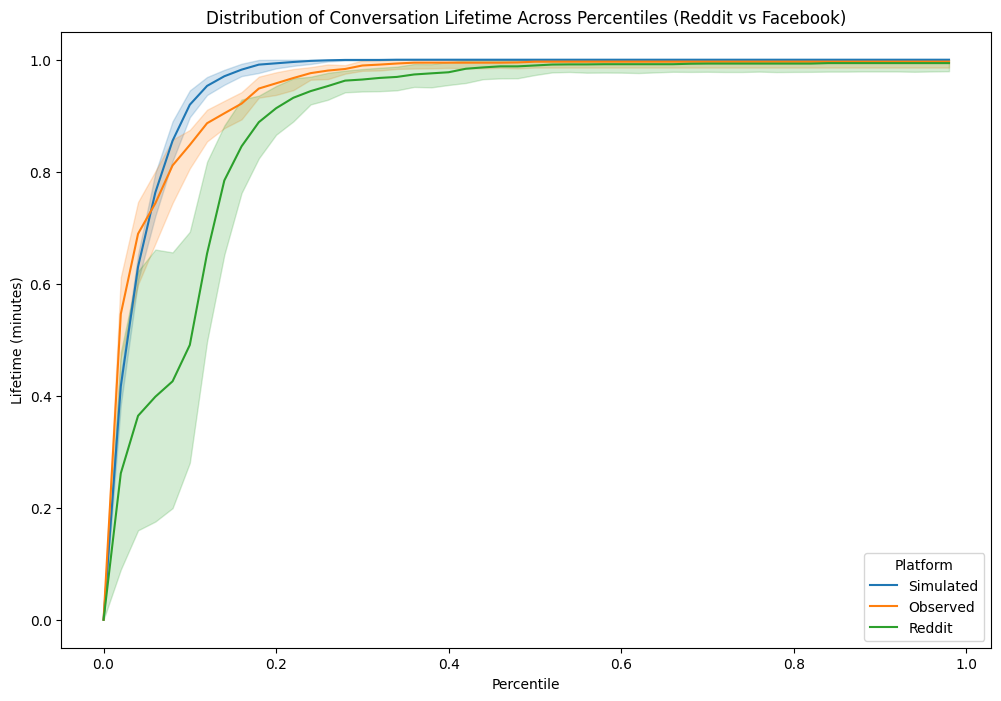

In [11]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 0.8,20

### Parameters RD

In [80]:
a=1.2# 2
b=13
alpha=0.8# 0.8
lambda_=10
mu=0.0018 #0.002
sd=0.01
k=1.01
simulated, observed=simulate_data(rd, alpha, lambda_, mu, sd, a, b, k, num_threads=100)

100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


In [78]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Reddit'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:100])], time_intervals)
reddit_ECDF['Platform']='Facebook'
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:01<00:00, 67.15it/s]


In [79]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 424.97


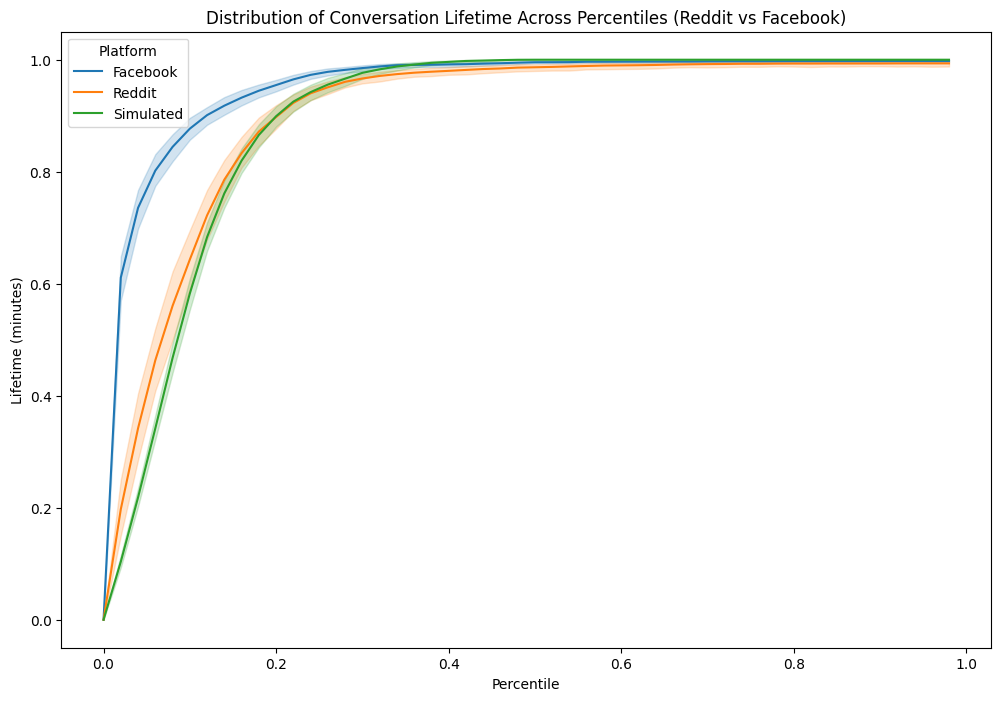

In [76]:
combined_results = pd.concat([reddit_ECDF, observed_ECDF,simulated_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 2,20

### Go

## Grid Search

In [ ]:
import itertools
import pandas as pd

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.8,2,3,4,5,7],
    'b': [5,10,15, 20, 25,30],
    'alpha': [1,0.95,0.9,0.8],
    'lambda_': [1,2,3],
    'mu': [100],
    'sd': [1],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(fb, alpha, lambda_, mu, sd, a, b, k, num_threads=1)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])




,a,b,alpha,lambda_,mu,sd,k,Error
0,0.1,5,1,1,1,1,1.0,22.475660
1,0.1,10,1,1,1,1,1.0,31.839214
2,0.1,15,1,1,1,1,1.0,33.795435
3,0.1,20,1,1,1,1,1.0,34.663632
4,0.1,25,1,1,1,1,1.0,35.510276
5,0.1,30,1,1,1,1,1.0,37.083898
6,0.8,5,1,1,1,1,1.0,70.229256
7,0.8,10,1,1,1,1,1.0,25.480187
8,0.8,15,1,1,1,1,1.0,15.639015
9,0.8,20,1,1,1,1,1.0,14.904662
